### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- esc: 셀 나가기
- m: 마크다운 셀로 바꾸기
- y: 마크다운 셀을 다시 Code로 바꾸기

# 05장_분류

## 5.1 이항 분류

In [1]:
# 와인 데이터를 통해 이항 분류를 수행
import pandas as pd
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
# 두 개의 데이터프레임을 하나로 합침

red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) 
print(wine.describe()) # 데이터 통계 정보 확인

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

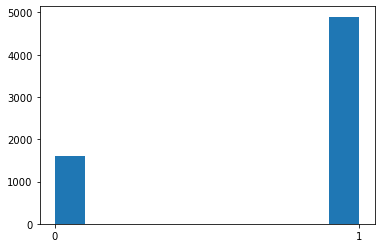

1    4898
0    1599
Name: type, dtype: int64


In [3]:
# 간단한 그래프 
# 1 값이 0 값 보다 많음

import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

In [4]:
# 데이터 요약 정보 확인
# 데이터 정규화 info() 함수 이용

print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [5]:
# 데이터 정규화

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [6]:
# 데이터를 섞은 후 넘파이 array로 변환
# 1과 0이 비슷한 비율로 들어가도록 데이터를 섞음

import numpy as np
# sample은 전체 데이터 프레임에서 frac 인수로 지정된 비율만큼 행을 랜덤하게 뽑아서 새로운 데이터 프레임을 만듦
wine_shuffle = wine_norm.sample(frac=1) #frac = 1 이므로 100% , 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과임 
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4732       0.123967          0.153333     0.228916        0.151840   0.036545   
2150       0.264463          0.106667     0.204819        0.036810   0.043189   
3555       0.165289          0.040000     0.090361        0.084356   0.054817   
1224       0.727273          0.206667     0.295181        0.029141   0.117940   
3244       0.239669          0.086667     0.216867        0.121933   0.018272   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4732             0.180556              0.308756  0.117602  0.480620   
2150             0.121528              0.221198  0.065356  0.356589   
3555             0.090278              0.269585  0.125506  0.263566   
1224             0.024306              0.032258  0.233083  0.271318   
3244             0.065972              0.184332  0.083864  0.364341   

      sulphates   alcohol   quality  type  
4732   0.134831  0.536232  0.500000   1.0 

In [7]:
# 훈련 데이터와 테스트 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# utils의 to_categorical은 target 값을 one-hot-encoding 방식으로 바꿈
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.12396694 0.15333333 0.22891566 0.15184049 0.03654485 0.18055556
 0.30875576 0.1176017  0.48062016 0.13483146 0.53623188 0.5       ]
1.0
[0.2231405  0.16       0.27108434 0.10889571 0.02159468 0.10416667
 0.20967742 0.08155003 0.37209302 0.26966292 0.68115942 0.66666667]
1.0
[0. 1.]
[0. 1.]


In [8]:
# 와인 데이터세트 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [9]:
#와인 데이터세트에 대한 분류 학습 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9407 - val_loss: 0.0544 - val_accuracy: 0.9869
Epoch 2/25
122/122 [==============================] - 0s 564us/step - loss: 0.0676 - accuracy: 0.9831 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 3/25
122/122 [==============================] - 0s 572us/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0660 - val_accuracy: 0.9838
Epoch 4/25
122/122 [==============================] - 0s 556us/step - loss: 0.0630 - accuracy: 0.9828 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 5/25
122/122 [==============================] - 0s 564us/step - loss: 0.0421 - accuracy: 0.9910 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 6/25
122/122 [==============================] - 0s 564us/step - loss: 0.0459 - accuracy: 0.9872 - val_loss: 0.0512 - val_accuracy: 0.9854
Epoch 7/25
122/122 [==============================] - 0s 548us/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.0308 - val_accuracy: 0

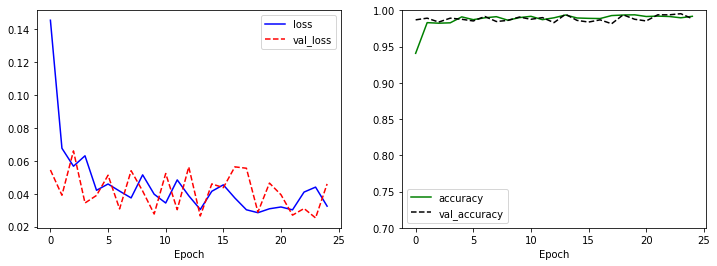

In [10]:
# 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [11]:
# 분류 모델 평가

model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 341us/step - loss: 0.0891 - accuracy: 0.9877


[0.08909939974546432, 0.9876922965049744]

## 5.2 다항 분류
* 범주의 수가 2개를 초과하는 경우

In [12]:
# 와인의 품질 (0~10) 예측

print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


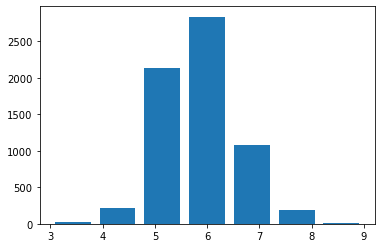

In [13]:
# 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [14]:
# 데이터의 양이 작고 범주의 수가 많음
# 데이터의 숫자 차이도 존재하기 때문에 세세한 분류는 어려울 것으로 판단됨
# 품짐을 3개의 범주(좋음, 보통, 나쁨)로 재분류

wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [15]:
# 데이터 정규화 및 훈련 데이터와 테스트 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [16]:
# 와인 데이터세트 다항 분류 모델 생성 및 학습

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8147 - val_loss: 0.4339 - val_accuracy: 0.7808
Epoch 2/25
122/122 [==============================] - 0s 548us/step - loss: 0.4126 - accuracy: 0.8193 - val_loss: 0.4286 - val_accuracy: 0.7808
Epoch 3/25
122/122 [==============================] - 0s 531us/step - loss: 0.4011 - accuracy: 0.8158 - val_loss: 0.4132 - val_accuracy: 0.7900
Epoch 4/25
122/122 [==============================] - 0s 515us/step - loss: 0.4029 - accuracy: 0.8081 - val_loss: 0.4357 - val_accuracy: 0.7808
Epoch 5/25
122/122 [==============================] - 0s 515us/step - loss: 0.3900 - accuracy: 0.8134 - val_loss: 0.4087 - val_accuracy: 0.8023
Epoch 6/25
122/122 [==============================] - 0s 523us/step - loss: 0.3939 - accuracy: 0.8132 - val_loss: 0.4359 - val_accuracy: 0.8177
Epoch 7/25
122/122 [==============================] - 0s 548us/step - loss: 0.3965 - accuracy: 0.8178 - val_loss: 0.4050 - val_accuracy: 0

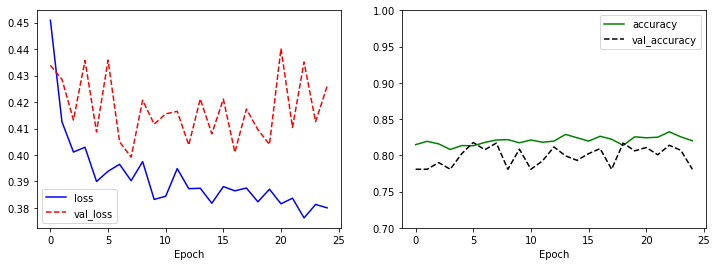

In [18]:
# 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

* 이항 분류보다 정답을 찾기 어려운 문제이기 때문인지 val_loss가 중간에 튀고, 전반적으로 loss도 큼


In [19]:
# 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 462us/step - loss: 0.4200 - accuracy: 0.7908


[0.4199792146682739, 0.7907692193984985]

* 데이터의 구성이 균일하지 않기 때문에 이 이상으로 좋은 성과를 내기 위해서는 네트워크의 크기를 키워보거나 학습률을 조정해보는 등 노력이 필요함

## 5.3 Fashion MNIST

In [55]:
# Fashion MNIST 데이터세트 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


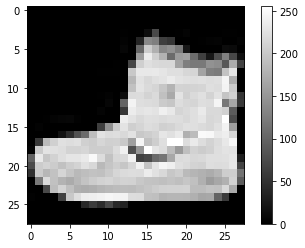

9


In [56]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [57]:
# 데이터 정규화
# 최대, 최소값을 이미 알고있기 떄문에 이미지의 각 픽셀값을 255로 나누기만 하면 0~1 사이로 정규화 됨

train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [58]:
# Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)


Epoch 1/25
1407/1407 [==============================] - 1s 641us/step - loss: 0.5199 - accuracy: 0.8170 - val_loss: 0.4362 - val_accuracy: 0.8471
Epoch 2/25
1407/1407 [==============================] - 1s 591us/step - loss: 0.3911 - accuracy: 0.8611 - val_loss: 0.3901 - val_accuracy: 0.8563
Epoch 3/25
1407/1407 [==============================] - 1s 582us/step - loss: 0.3499 - accuracy: 0.8715 - val_loss: 0.3602 - val_accuracy: 0.8678
Epoch 4/25
1407/1407 [==============================] - 1s 622us/step - loss: 0.3222 - accuracy: 0.8818 - val_loss: 0.3559 - val_accuracy: 0.8715
Epoch 5/25
1407/1407 [==============================] - 1s 631us/step - loss: 0.3049 - accuracy: 0.8874 - val_loss: 0.3486 - val_accuracy: 0.8725
Epoch 6/25
1407/1407 [==============================] - 1s 579us/step - loss: 0.2899 - accuracy: 0.8924 - val_loss: 0.3228 - val_accuracy: 0.8816
Epoch 7/25
1407/1407 [==============================] - 1s 590us/step - loss: 0.2730 - accuracy: 0.8984 - val_loss: 0.3311 -

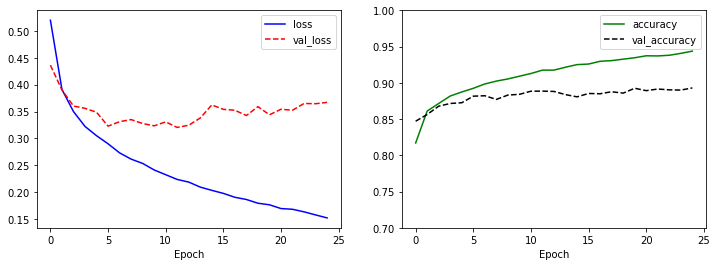

In [62]:
# Fashion MNIST 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [63]:
# Fashion MNIST 분류 모델 평가

model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 421us/step - loss: 0.4089 - accuracy: 0.8818


[0.4088648855686188, 0.8817999958992004]

# EOD